# More Titanic? More Titanic.

![titanic picture from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

In [38]:
# first, need our imports and to grab the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('data/titanic.csv')

In [2]:
# Let's look and remember what's in the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### What are the most common last names?

Wait, the last names are part of the full name column... first we'll need to grab the last names!

A few ways we can do this:

In [5]:
# Need to grab last names ... but how?
df['Name'].str.split(", ").map(lambda x: x[0] )

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [3]:
ln_list=[]
for row in df.index:
    ln = df['Name'].str.split(", ")[row][0]
    ln_list.append(ln)

In [27]:
ln_list[:5]

['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen']

In [28]:
most_common_ln = ln_list[:5]

In [6]:
pd.Series(name[0] for name in df['Name'].str.split(", "))

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Length: 891, dtype: object

In [19]:
df['Last Name'] = pd.Series(name[0] for name in df['Name'].str.split(", "))

In [20]:
df['Last Name'].value_counts()

Andersson        9
Sage             7
Carter           6
Goodwin          6
Johnson          6
                ..
de Pelsmaeker    1
Fahlstrom        1
Christy          1
Carr             1
Meanwell         1
Name: Last Name, Length: 667, dtype: int64

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


`groupby` or `value_counts`?

In [14]:
df[['PassengerId', 'Last Name']].groupby(by = 'Last Name').count().sort_values(by='PassengerId', ascending=False)

,PassengerId
Last Name,
Andersson,9
Sage,7
Skoog,6
Carter,6
Goodwin,6
...,...
Henry,1
Hewlett,1
Hirvonen,1


Now let's visualize:

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.loc[df['Last Name'] == 'Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson


In [29]:
# Plot a bar graph of the most common last names
plt.bar(most_common_ln.index, most_common_ln)

AttributeError: module 'matplotlib' has no attribute 'bar'

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

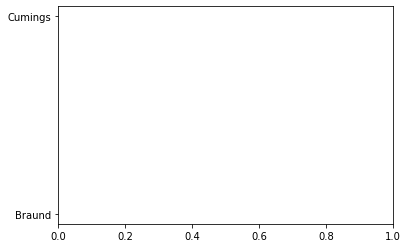

In [42]:
plt.bar(most_common_ln.index, most_common_ln)

### Who Paid the Most Fare?

As always - a few ways we can do this: `.loc` versus `sort_values`

In [31]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [43]:
max_fare = df['Fare'].max()

In [46]:
df.loc[max_fare]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [512.3292] of <class 'float'>

In [47]:
df.loc[df['Fare'] == df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [33]:
df.loc[df['Fare'] == df['Fare'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Leonard
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Harrison
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Tornquist
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Parkes
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Johnson
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Cunningham
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Campbell
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Frost
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Johnson
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Parr


In [36]:
df.sort_values(by='Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune


And let's visualize some more!

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

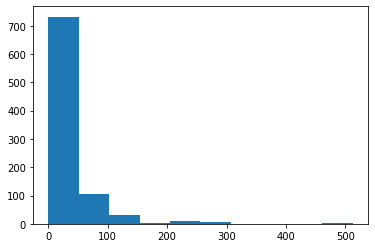

In [40]:
# Plot a histogram - but now, let's do all fares
plt.hist(df['Fare'])

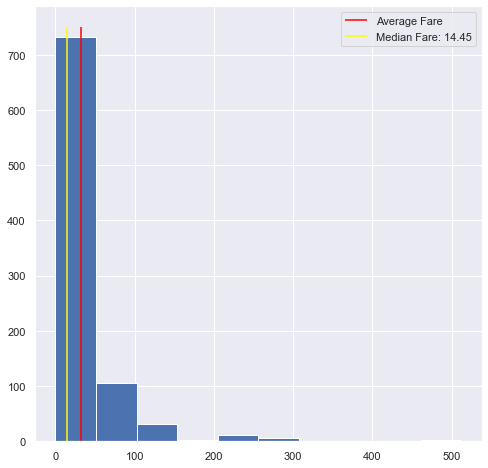

In [54]:
# Okay that's pretty bland, let's see if we can add more detail
plt.figure(figsize=(8,8))
plt.hist(df['Fare'])
plt.vlines(df['Fare'].mean(),0,750,label='Average Fare', color='red')
plt.vlines(df['Fare'].median(),0,750,label=f"Median Fare: {df['Fare'].median():.2f}", color='yellow')
plt.legend()
plt.show()

## Seaborn 

![Sam Seaborn from West Wing, image from the TV guide](https://tvguide1.cbsistatic.com/i/2017/01/07/0f1a6ab5-8c63-4869-9f85-5d8b2b14913b/cf2e9396152ee85468e5bcfe063053a4/010717-west-wing-rob-lowe-news.jpg)

[Seaborn, I choose you!](https://elitedatascience.com/python-seaborn-tutorial) (aka an excellent exploration of the functionality of Seaborn)

Now let's practice with Seaborn:

In [52]:
import seaborn as sns
sns.set(style='darkgrid')
# Same as sns.set_style('darkgrid')

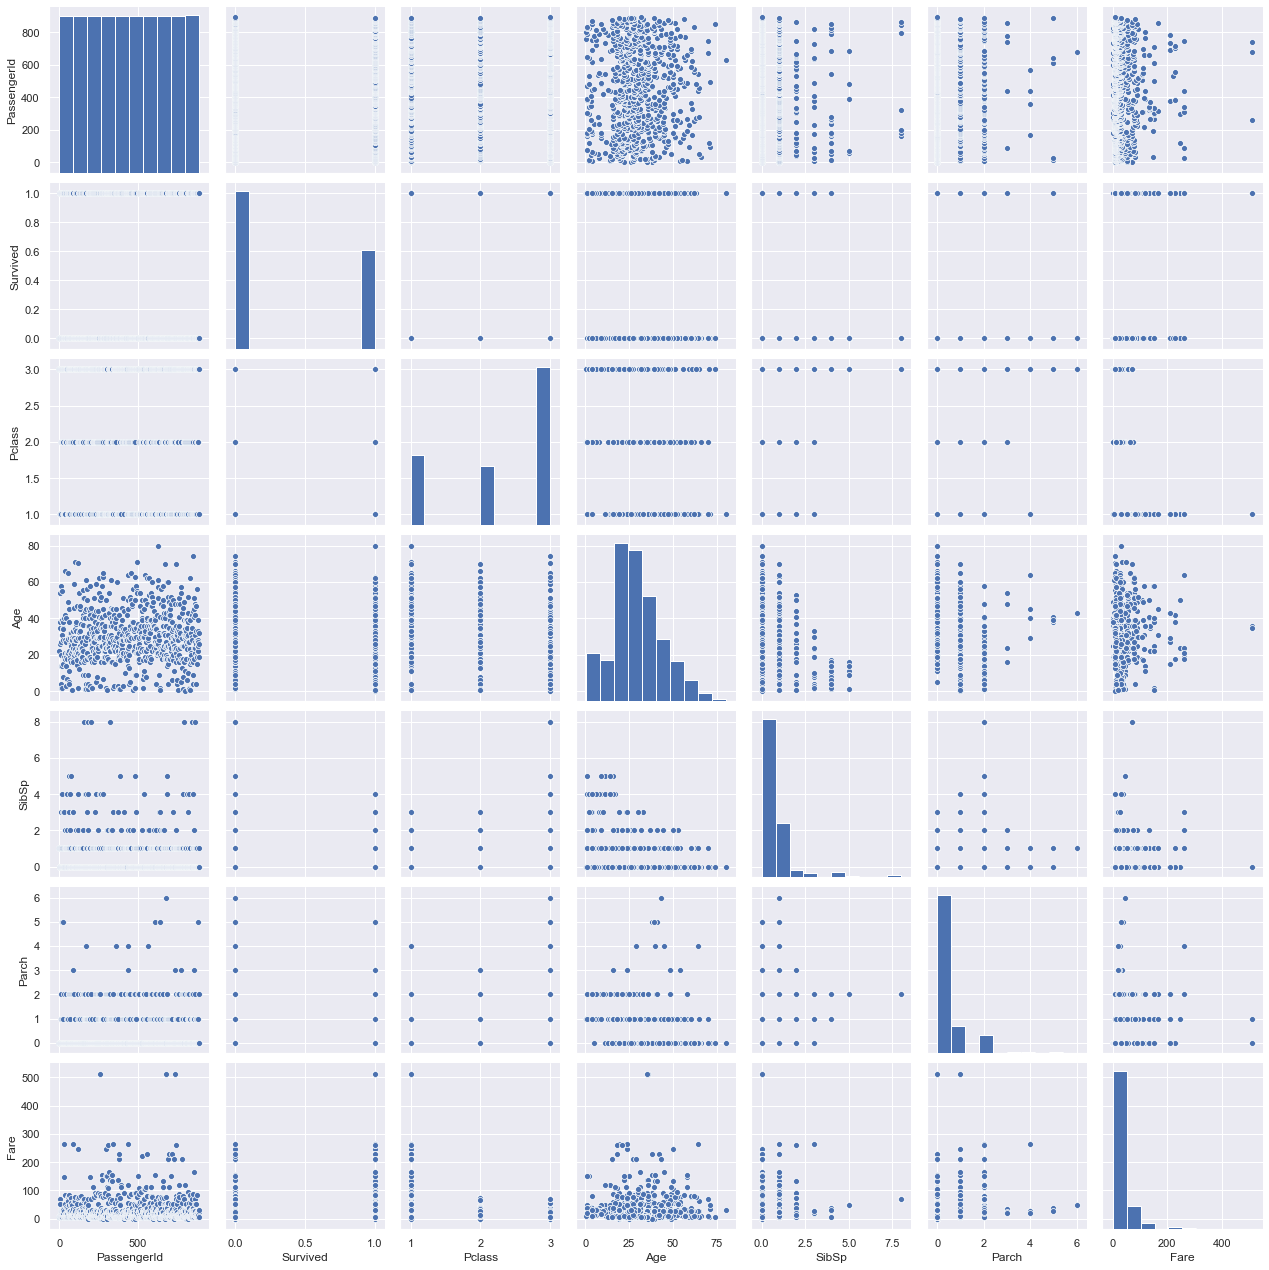

In [55]:
# We've mentioned pairplots, let's take a look...
sns.pairplot(df)

In [60]:
sns.__version__

'0.10.0'

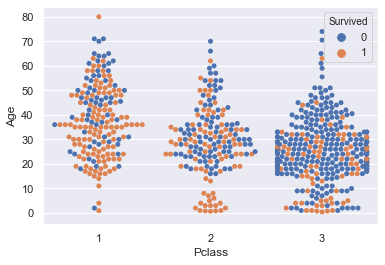

In [56]:
# Try out a swarm plot with class and age
sns.swarmplot('Pclass', 'Age', data=df, hue='Survived')

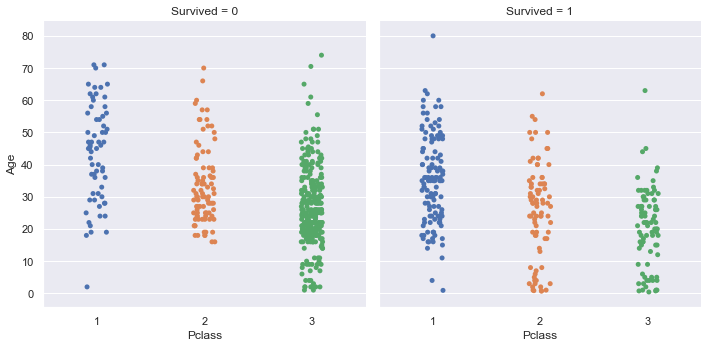

In [57]:
# Let's try a categorical plot (used to be a factor plot)
# Do the same swarmplot, but now make columns of survived
sns.catplot('Pclass', 'Age', data=df, col='Survived')